In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.12. Example.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


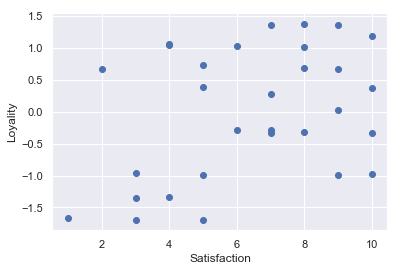

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

In [4]:
kmeans = KMeans(2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
predict = kmeans.fit_predict(data)

In [6]:
predict

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0])

In [7]:
new_data = data.copy()
new_data['Cluster'] = predict
new_data.head()

,Satisfaction,Loyalty,Cluster
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


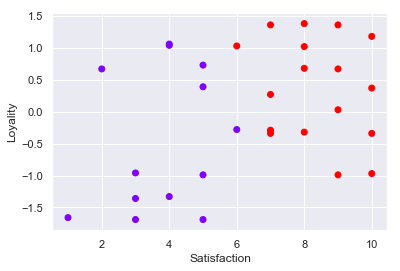

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=new_data['Cluster'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

## Standarize the Variable

In [9]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.99999999999999,
 29.818973034723147,
 17.913349527387965,
 10.247181805928424,
 7.792695153937187,
 6.666688373390819,
 5.366082587179451,
 4.315662464700006,
 3.8500090249787062]

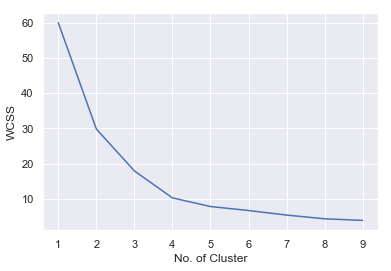

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('No. of Cluster')
plt.ylabel('WCSS')
plt.show()

## Exploring the cluster

In [12]:
Kmeans_new = KMeans(5)
Kmeans_new.fit(data_scaled)
Cluster_new = data.copy()
Cluster_new['Clustered'] = Kmeans_new.fit_predict(data_scaled)
Cluster_new.head()

,Satisfaction,Loyalty,Clustered
0,4,-1.33,4
1,6,-0.28,0
2,5,-0.99,4
3,7,-0.29,0
4,4,1.06,2


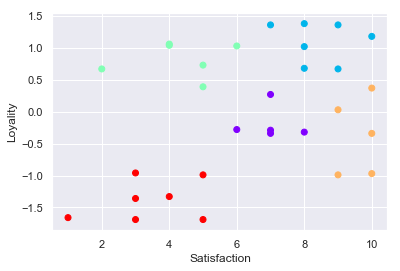

In [13]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=Cluster_new['Clustered'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()